# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)" data-toc-modified-id="19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)</a></div><div class="lev1 toc-item"><a href="#Создание-пайплайна-и-генерация-признаков" data-toc-modified-id="Создание-пайплайна-и-генерация-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание пайплайна и генерация признаков</a></div><div class="lev2 toc-item"><a href="#Посмотрим-на-данные" data-toc-modified-id="Посмотрим-на-данные-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на данные</a></div><div class="lev2 toc-item"><a href="#Генерим-признаки" data-toc-modified-id="Генерим-признаки-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Генерим признаки</a></div><div class="lev2 toc-item"><a href="#Подбор-гипер-параметров" data-toc-modified-id="Подбор-гипер-параметров-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гипер-параметров</a></div><div class="lev3 toc-item"><a href="#Pipeline" data-toc-modified-id="Pipeline-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Pipeline</a></div><div class="lev3 toc-item"><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Подбор гиперпараметров</a></div><div class="lev4 toc-item"><a href="#Grid-search" data-toc-modified-id="Grid-search-2321"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Grid search</a></div><div class="lev4 toc-item"><a href="#Random-Search" data-toc-modified-id="Random-Search-2322"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Random Search</a></div><div class="lev3 toc-item"><a href="#HyperOpt" data-toc-modified-id="HyperOpt-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>HyperOpt</a></div><div class="lev2 toc-item"><a href="#Ваш-черед" data-toc-modified-id="Ваш-черед-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ваш черед</a></div><div class="lev3 toc-item"><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Новые признаки</a></div><div class="lev2 toc-item"><a href="#Поиск-гиперпараметров" data-toc-modified-id="Поиск-гиперпараметров-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск гиперпараметров</a></div>

# Skillfactory - Практический Machine Learning
## 19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)

<center> Шестаков Андрей </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Создание пайплайна и генерация признаков
<center>Шестаков Андрей</center>

В этом задании мы рассмотрим данные с предыдущего Sberbank Data Science Contest. К сожалению найти страницу с конкурсом уже не получается.

Одной из задач была опредление пола владельца карты по его транзакциям на карте. Зачем это нужно - одному сберу известно, но эта задача была хороша тем, что в ней можно нагенерировать много разных признаков

Есть такая [презентация](https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf) с предварительным анализом данных и идеями про признаки

Нам понадобятся файлы `customers_gender_train.csv`, `transactions.tsv.gz`, `mcc_types.tsv` и `trans_types.tsv`.

## Посмотрим на данные

Это метки ответов

In [2]:
df_gender = pd.read_csv('data/customers_gender_train.csv')
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


Это сами транзакции (отрицательные транзакции - списывание, положительные - зачисление на счет)

In [3]:
df_transactions = pd.read_csv('data/transactions.csv.gz')
df_transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


Далее, расшифровки кодов [mcc](https://ru.wikipedia.org/wiki/Merchant_Category_Code) и транзакций

In [4]:
df_tr = pd.read_csv('data/tr_types.csv', sep=';')
df_tr.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [5]:
df_mcc = pd.read_csv('data/tr_mcc_codes.csv', sep=';')
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


Первое что мы видем - это странная дата и суммы в транзакциях. 

В принципе, посмотрев на исходное распределение "относительных" дат по какой-нибудь гендерной группы mcc, становится примерно понятно, что за даты закодированы.

Ну а суммы транзакций организаторы просто умножили на $\pi^{\exp}$ =)

Преобразование будет проделано ниже, но при желании, можете сами со всем разобраться.

In [6]:
from pandas import Timestamp, DateOffset

In [7]:
def preproc_transactions(df_transactions):
    sec_per_day = 86400
    sec_per_hour = 3600
    
    start_date = 1420070400 - 154 * sec_per_day - 3 * sec_per_hour
    
    df_transactions.loc[:, 'day'] = df_transactions.tr_datetime\
                                               .str.split(' ')\
                                               .str.get(0)\
                                               .astype(int)
    df_transactions.loc[:, 'time_raw'] = df_transactions.tr_datetime\
                                                    .str.split(' ')\
                                                    .str.get(1)

    # set temp dt
    df_transactions.loc[:, 'dt_temp'] = pd.to_datetime(df_transactions.loc[:, 'time_raw'], 
                                                    format='%H:%M:%S')\
                                        + DateOffset(years=115)
    
    df_transactions = df_transactions.assign(dt = lambda x: x.dt_temp.astype(np.int64) // 10**9
                                             + (x.day - 153) * sec_per_day)\
                                     .assign(weekday = lambda x: ((x.day + 4) % 7 + 1))
        
    df_transactions.loc[:, 'datetime'] = pd.to_datetime(df_transactions.dt, unit='s')
    df_transactions.loc[:, 'date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%Y-%m-%d')
    df_transactions.loc[:, 'hour'] = df_transactions.loc[:, 'datetime'].dt.strftime('%H')
    
    df_transactions = df_transactions.drop(['dt_temp', 'time_raw', 'tr_datetime'], axis=1)
    
    df_transactions.loc[:, 'amount'] = np.round(df_transactions.loc[:, 'amount']/(np.pi**np.exp(1)))
            
    return df_transactions

In [8]:
df_transactions = df_transactions.pipe(preproc_transactions)

In [9]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


## Генерим признаки

В качестве базовых признаков, можно взять, например, 
* количество (доля) транзакций по каждому mcc_code
* количество (доля) транзакций в разные промежутки времени

In [10]:
def gen_features(df_gender, df_transactions):
    
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_mcc_counts = df_mcc_counts.rename_axis(lambda x: 'mcc_{}_count'.format(x), axis=1)

    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # Сложная и нетривиальная конструкция
    total = df_hour_rations.sum(axis=1)
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T


    # Объединяем:
    df_features = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                           .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')
        
    return df_features

In [11]:
df_features = df_gender.pipe(gen_features, df_transactions)
df_features.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  


,customer_id,gender,mcc_742_count,mcc_1711_count,mcc_1731_count,mcc_1799_count,mcc_2741_count,mcc_3000_count,mcc_3351_count,mcc_3501_count,...,mcc_8999_count,mcc_9211_count,mcc_9222_count,mcc_9311_count,mcc_9399_count,mcc_9402_count,morning,day,evening,night
0,75562265,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.262658,0.329114,0.325949,0.082278
1,10928546,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2,0,0.352697,0.413555,0.042877,0.190871
2,69348468,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0.296804,0.493151,0.196347,0.013699
3,84816985,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.247423,0.494845,0.216495,0.041237
4,61009479,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.636943,0.239915,0.004246,0.118896


In [12]:
label = 'gender'
idx_features = df_features.columns != label

In [13]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

## Подбор гипер-параметров

### Pipeline

Сделаем простой sklearn пайплайн, который делает следующее:
* Нормирует признаки через StandartScaler
* Запускает лог-регрессию

In [14]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [16]:
RND_SEED = 123

### Подбор гиперпараметров

До этого мы исключительно смотрели, как влияет на меру качества какой-то один параметр при фиксированных остальных. Пришло время перебирать все что можно!

В базовом варианте, это делается либо через `Grid Search`, либо через `Random Search`. Какие ключевые отличия?
* В `Grid Search` вы в явнов виде задаете возможные значения каждого гипер-параметра, который хотите варьировать. Соответственно, выполняется **полный** перебор всех возможных комбинаций
* В `Random Search` допукается указание распределения параметров, например "равномерно, на интервале от 0 до 100" или "нормальное распределение с таким-то цетром и такой-то дисперсией. Соответственно, так как это случайный перебор, то **вы** просто **задаете** количество случайных комбинаций, которые будут проверяться

Может показаться, что делать случайный перебор опасно - там же все случайно. Но на практике именно он и искользуется в силу двух причин
* Полный перебор большого количества комбинаций очень долгий
* Мы можем просто пропустить значения гиперпараметра, которые сильно влияют на метрику качества (см рисунок снизу)

<img src='img/gridsearch.jpeg'>

Попробуем оба варианта

#### Grid search

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [18]:
# Задаем значения параметров, которые хотим проверить

# в данном случае "__" разленяет название гиперпараметра от этапа, где этот гиперпараметр используется
# если у нас будет не пайплайн, а просто один классификатор, то разделитель указывать не нужно
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': np.logspace(-5, 3, 10)
}

print(param_grid)

# Задаем схему кросс-валидации
cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])}


In [19]:
grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             n_jobs=-1, cv=cv, 
                             verbose=2)

# grid_searcher.fit(X, y)

На выходе в grid_searcher можно посмотреть, какая комбинация оказалась наилучшей, сколько занял рачет и напрямую достать лучшую модель.

In [20]:
# grid_searcher.best_params_

In [21]:
# grid_searcher.best_score_

In [22]:
# results = pd.DataFrame(grid_searcher.cv_results_)

In [23]:
# results.head()

In [24]:
# best_model = grid_searcher.best_estimator_

#### Random Search

In [25]:
from scipy.stats import randint as sp_randint
from scipy.stats import lognorm as sp_lognorm

In [26]:
sp_lognorm(4).rvs()

0.011946257860258677

In [27]:
# Задаем значения параметров, которые хотим проверить
# Теперь с распределениями
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': sp_lognorm(4)
}

print(param_grid)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb6cb320f28>}


In [28]:
# Рассмотрим 20 случайных комбинаций
random_searcher = RandomizedSearchCV(model, param_grid, n_iter=20, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     n_jobs=-1, cv=cv, 
                                     verbose=2)

# random_searcher.fit(X, y)

Аналогичный выхлоп

In [29]:
# random_searcher.best_params_

In [30]:
# random_searcher.best_score_

In [31]:
# results = pd.DataFrame(random_searcher.cv_results_)

In [32]:
# results.head()

In [33]:
# best_model = random_searcher.best_estimator_

### HyperOpt

Есть еще другой вариант - "умный" перебор параметров. И вот тут нам помогает библиотека `hyperopt`.

Если невдаваться в детали, то `hyperopt` определяет следующего набора-кандидата с помощью некоторого алгоритма, который балансирует исследование еще не изведанных областей значений гиперпараметров и направления, вдоль которых наблюдались улучшения целеой метрики.

То есть мы задаем некоторую функцию, и ставим себе цель **минимизировать** (такова договоренность в `hyperopt`) ее значение исходя из параметров, которые она принимает.

Например, возьмем функцию $f(x) = \sin(x)/x$ и будем искать ее минимум при условии, что $x$ будет равномерно распределен на интервале $[-7.5, 7.5]$

In [34]:
# sudo pip install networkx==1.11

In [35]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand

In [36]:
trials = Trials()
best = fmin(
    fn=lambda x: -np.sin(x)/x,
    space=hp.uniform('x', -7.5, 7.5),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print(best)


{'x': 0.001461856808837314}


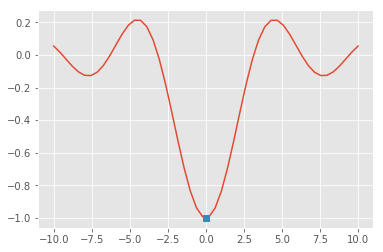

In [37]:
x = np.linspace(-10,10,50)
func = lambda x: -np.sin(x)/x
y = func(x)
plt.plot(x,y)

y_best = func(best['x'])
plt.plot(best['x'], y_best, marker='s')

Нашли)

Возвращаясь к нашим баранам, функция вданном случае будет возвращать метрику качества модели (пайплайна) на кроссвалидации. С помощью `hyperopt` мы будем искать минимум этой функции при заданных диаполознах значений гипер параметров.

Но самым важным плюсом, как по мне, является гибкость - в функцию, которую мы хотим минимизировать можно написать все что угодно. Например, сейчас я добавлю вариативность в пайплайне по типу шкалирования между - StandartScaler или RobustScaler.

In [38]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [39]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [40]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [41]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [42]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

In [43]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].items():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

Достаем результаты.

Стоит оговорится, что в некоторых столбцах указаны не фактические значение гиперпараметров, а их позиция в соответствуюем поле в `space4_lm`

In [44]:
df_trials = trials_df(trials)

Здесь `qscore` - метрика качесва, а `scaler_type = 1` означает, что был выбран `scaler_type = robust`

In [45]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
36,0.024114,0,0,0.836847,-0.003544,1,1
35,0.023734,0,0,0.836841,-0.003552,1,1
31,0.025709,1,0,0.836744,-0.003660,1,1
16,0.015819,1,0,0.836246,-0.004166,1,1
33,0.049571,1,0,0.836240,-0.003084,1,1


## Ваш черед

### Новые признаки

Задание творческое - придумайте по новому признаку (группе признаков)
* На основе mcc (tr_type)
* На основе временного фактора
* На основе текстов из описания mcc

Реалиуйте их в функции, аналогичной `gen_features`.

In [46]:
from  sklearn.feature_extraction.text import CountVectorizer

from gensim.models.word2vec import Word2Vec # Собственно модель.
from gensim.models.word2vec import LineSentence # Выравнивание текста по предложениям.
from gensim.models import KeyedVectors # Семантические вектора.
# На самом деле, нам потребуется только последняя.
import numpy as np # Вектора.
import umap
import matplotlib.pyplot as plt
import re
import pymorphy2
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import DictVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

stop_words = [
    'для',
    'не',
    'нигде',
    'по',
    'ранее',
    'более',
    'рае',
    'прямой',
    'включая',
    'на',
    'другие',
    'различные',
    'из'
]

N=20 

def replace_all(text, dic):
    for i in dic:
        text = re.sub('\\s+', ' ', re.sub('\\b' + i + '\\b', '', text))
    return text

def w_prepare(texts):
    return texts.apply(lambda t: replace_all(re.sub('[^а-я0-9 ]', ' ', t.lower()), stop_words))

def gen_my_features(df_gender, df_transactions):
    #     tr_type category
    df_tr_type_category = df_transactions.copy()
    df_tr_type_category['category'] = df_tr_type_category.tr_type//1000
    
    df_tr_type_category = \
    df_tr_type_category.pivot_table(index=['customer_id'], columns='category', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_tr_type_category = df_tr_type_category.rename_axis(lambda x: 'category_{}_count'.format(x), axis=1)

   
    df_workday = df_transactions.copy()
    df_workday['workday'] = df_workday.weekday < 6

    df_workday = \
    df_workday.pivot_table(index=['customer_id'], columns='workday', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_workday = df_workday.rename_axis(lambda x: 'workday_{}_count'.format(x), axis=1)

    df_mcc_code_sub_category = df_transactions.copy()
    df_mcc_code_sub_category['sub_category'] = df_mcc_code_sub_category.tr_type//100
    
    df_mcc_code_sub_category = \
    df_mcc_code_sub_category.pivot_table(index=['customer_id'], columns='sub_category', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_mcc_code_sub_category = df_mcc_code_sub_category.rename_axis(lambda x: 'sub_category_{}_count'.format(x), axis=1)

    morph=pymorphy2.MorphAnalyzer()

    df_prepared = w_prepare(df_mcc.mcc_description)
    tv = TfidfVectorizer(max_features=N)
    tv_res = tv.fit_transform(df_prepared)

    idx = np.ravel(tv_res.sum(axis=0).argsort(axis=1))[::-1][:N]
    tc_top_words = np.array(tv.get_feature_names())[idx].tolist()

    df_mcc_cats = df_transactions[['customer_id', 'mcc_code']].merge(df_mcc, on='mcc_code', how='left')
    for w in tc_top_words:
        df_mcc_cats[w] = df_mcc_cats.mcc_description.map(lambda t: 1 if w in t else 0)
    
    df_mcc_cats = df_mcc_cats.drop(columns=['mcc_description', 'mcc_code'], axis=1)
    
    df_mcc_cats = df_mcc_cats.groupby(['customer_id'])[tc_top_words].apply(lambda x : x.astype(int).sum())

    df_features = df_gender.join(df_tr_type_category, on='customer_id', how='left')\
                           .join(df_mcc_code_sub_category, on='customer_id', how='left')\
                           .join(df_workday, on='customer_id', how='left')\
                           .join(df_mcc_cats, on='customer_id', how='left')
    return df_features

In [47]:
df_my_features = gen_my_features(df_gender, df_transactions).set_index('customer_id')
df_my_features.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead


,gender,category_1_count,category_2_count,category_4_count,category_6_count,category_7_count,category_8_count,sub_category_10_count,sub_category_11_count,sub_category_12_count,...,клубы,агентства,розницу,институты,финансовые,ремонт,сервис,одежды,принадлежности,продаже
customer_id,,,,,,,,,,,,,,,,,,,,,
75562265,0,203,65,1,0,47,0,203,0,0,...,0,0,0,113,0,0,0,0,1,2
10928546,1,295,373,34,5,16,0,161,60,74,...,0,1,0,359,0,2,7,69,0,6
69348468,1,335,98,0,0,5,0,161,174,0,...,0,0,0,102,0,0,0,0,0,0
84816985,1,52,14,8,1,22,0,49,3,0,...,0,0,0,41,0,9,9,0,0,0
61009479,0,160,175,33,0,103,0,105,55,0,...,0,0,0,226,0,0,2,3,0,0


In [48]:
# Попробуем word2vec
model_w2v = KeyedVectors.load_word2vec_format('data/ruscorpora_upos_skipgram_300_5_2018.vec')

In [49]:
morph=pymorphy2.MorphAnalyzer()

def text_to_vec(dct, model, size):
    text_vec = np.zeros((size,), dtype="float32")
    n_words = 0

    index2word_set = set(model.index2word)
    for word in dct.keys():
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model[word]) 
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec

posConv={'ADJF':'_ADJ','NOUN':'_NOUN','VERB':'_VERB'}
def getDictionary(text, needPos=None):
    words=[a[0] for a in re.findall("([А-ЯЁа-яё]+(-[А-ЯЁа-яё]+)*)", text)]
    reswords=[]

    for w in words:
        wordform=morph.parse(w)[0]
        try:
            if wordform.tag.POS in ['ADJF', 'NOUN', 'VERB']:
                if needPos!=None:
                    reswords.append(wordform.normal_form+self.posConv[wordform.tag.POS])
                else:
                    reswords.append(wordform.normal_form)
        except:
            pass

    stat=Counter(reswords)
#        stat={a: stat[a] for a in stat.keys() if stat[a]>1}
    return stat

def calcDictionaries(texts, needPos=None):
    dictionaries=[]
    for a in texts:
        dictionaries.append(getDictionary(a, needPos))
        
    return dictionaries

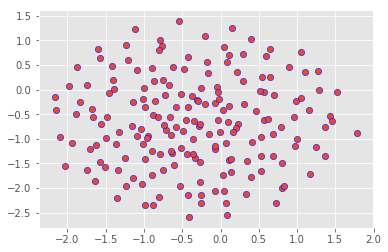

In [50]:
mcc_dictionaries = calcDictionaries(df_mcc.mcc_description, True)


umap_news=umap.UMAP()
w2v_vectors=np.array([text_to_vec(dct, model_w2v, 300) for dct in mcc_dictionaries])

umaped_v=umap_news.fit_transform(w2v_vectors)

fig, ax = plt.subplots()
ax.scatter(umaped_v[:, 0], umaped_v[:, 1], edgecolor='b', s=40)
plt.show()

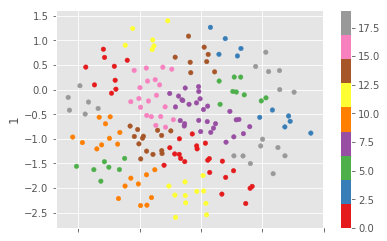

In [51]:
km=KMeans(n_clusters=20)
km_clusters=km.fit_predict(umaped_v)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=km_clusters, cmap=plt.cm.Set1)

In [52]:
# from sklearn.cluster import DBSCAN
# db=DBSCAN(eps=0.2, min_samples=2)
# db_clusters=db.fit_predict(umaped_v)
# ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=db_clusters, cmap=plt.cm.Set1)

In [53]:
# clusters=list(set(db_clusters))

# for c in clusters:
#     print(c)
#     cntr=0
#     for i, a in enumerate(df_mcc.mcc_description):
#         if db_clusters[i]==c:
#             print(a.split("-----")[0])
#             cntr+=1
#             if cntr==3:
#                 break

Структуры нет, анализ текста в данной ситуации не подходит. Проще всего использовать категорию (первая цифра кода) и подкатегорию (вторая цифра кода)

## Поиск гиперпараметров

Реализуйте функцию для hyperopt по перебору гипер параметров вашего пайплайна

На всякий случай почитайте еще про [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) и [пример](http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html#sphx-glr-auto-examples-hetero-feature-union-py)

In [54]:
df_features.head()

,customer_id,gender,mcc_742_count,mcc_1711_count,mcc_1731_count,mcc_1799_count,mcc_2741_count,mcc_3000_count,mcc_3351_count,mcc_3501_count,...,mcc_8999_count,mcc_9211_count,mcc_9222_count,mcc_9311_count,mcc_9399_count,mcc_9402_count,morning,day,evening,night
0,75562265,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.262658,0.329114,0.325949,0.082278
1,10928546,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2,0,0.352697,0.413555,0.042877,0.190871
2,69348468,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0.296804,0.493151,0.196347,0.013699
3,84816985,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.247423,0.494845,0.216495,0.041237
4,61009479,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.636943,0.239915,0.004246,0.118896


In [55]:
# df_mcc_cats = df_transactions[['customer_id', 'mcc_code']].merge(df_mcc, on='mcc_code', how='left').drop(columns=['mcc_code'], axis=1)

In [56]:
X = df_my_features.merge(df_features, on='customer_id').drop(columns=['gender_x', 'gender_y'], axis=1)#df_my_features.loc[:, idx_features].values
y = df_my_features['gender']

In [57]:
X.head()

,customer_id,category_1_count,category_2_count,category_4_count,category_6_count,category_7_count,category_8_count,sub_category_10_count,sub_category_11_count,sub_category_12_count,...,mcc_8999_count,mcc_9211_count,mcc_9222_count,mcc_9311_count,mcc_9399_count,mcc_9402_count,morning,day,evening,night
0,75562265,203,65,1,0,47,0,203,0,0,...,0,0,0,0,0,0,0.262658,0.329114,0.325949,0.082278
1,10928546,295,373,34,5,16,0,161,60,74,...,1,0,0,0,2,0,0.352697,0.413555,0.042877,0.190871
2,69348468,335,98,0,0,5,0,161,174,0,...,2,0,0,0,0,0,0.296804,0.493151,0.196347,0.013699
3,84816985,52,14,8,1,22,0,49,3,0,...,0,0,0,0,0,0,0.247423,0.494845,0.216495,0.041237
4,61009479,160,175,33,0,103,0,105,55,0,...,0,0,0,0,0,0,0.636943,0.239915,0.004246,0.118896


In [58]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        # Итоговый пайплайн
        
        model = Pipeline([
            # Use FeatureUnion to combine the features from subject and body
#             ('union', FeatureUnion(
#                 transformer_list=[
#                     # Pipeline for standard bag-of-words model for body
#                     ('body_bow', Pipeline([
#                         ('selector', ItemSelector(key='mcc_description')),
#                         ('tfidf', TfidfVectorizer()),
#                         ('best', TruncatedSVD(n_components=50)),
#                     ])),

#                     # Pipeline for pulling ad hoc features from post's body
#                     ('body_stats', Pipeline([
#                         ('selector', ItemSelector(key='mcc_description')),
#                         ('stats', TextStats()),  # returns a list of dicts
#                         ('vect', DictVectorizer()),  # list of dicts -> feature matrix
#                     ])),

#                 ],

#                 # weight components in FeatureUnion
#                 transformer_weights={
#                     'body_bow': 0.5,
#                     'body_stats': 1.0,
#                 },
#             )),

#             # Use a SVC classifier on the combined features
#             
            ('scaler', scaler),
            ('clf', clf)
        ])
        

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [62]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'lm_solver': hp.choice('solver', ['liblinear', 'sag', 'saga']),
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [63]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dsaponenko/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [64]:
df_trials = trials_df(trials)

In [65]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type,solver
22,0.007352,1,0,0.838319,-0.002923,0,1,0
32,0.006818,0,0,0.838269,-0.002827,0,1,0
27,0.007038,0,0,0.838253,-0.002807,0,1,0
24,0.007095,0,0,0.838247,-0.002806,0,1,0
21,0.007792,0,0,0.838206,-0.002793,0,1,0


In [ ]:
# А это трансформер, который выбирает подможнество столбцов из матрицы X
# Который нужен для того, чтобы делать какие-то действия только для подмноества столбцов, а потом объединять результаты
# Через FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, col_idx):
        self.col_idx = col_idx
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, self.col_idx]